Python Packages

In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sklearn packages

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,balanced_accuracy_score, classification_report, confusion_matrix, recall_score, roc_auc_score
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler


from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor

<b>PROBLEM</b>

* The problem in investing on a company is that sometimes the company doesn’t deliver what it is promised, ending up in wasting investor’s capital.

<b>GOAL</b>

* To create a model that can be used both by investors and individuals alike who are interested in either backing up a single product or investing a huge sum of capital on companies listed in Kickstarter by predicting the chances of success based on Kickstarter data.


In [3]:
df = pd.read_csv('ready.csv',index_col=0)
df

,state,backers,usd_pledged_real,usd_goal_real,time_avail,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater
ID,,,,,,,,,,,,,,,,,,,,
1000002330,0,0,0.0,1533.95,58,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1000003930,0,15,2421.0,30000.00,59,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1000004038,0,3,220.0,45000.00,44,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1000007540,0,1,1.0,5000.00,29,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1000014025,1,224,52375.0,50000.00,34,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999975836,0,4,154.0,6500.00,29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
999977640,0,5,155.0,1500.00,26,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
999986353,0,1,20.0,15000.00,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [4]:
X = df.drop(columns=['state'])
y = df.state

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y, test_size=.2,random_state=42)

In [6]:
X_train.shape

(269663, 19)

<b> Choosing several models </b><br>
in this section, i'll be trying out several model..
my goal is to get the model with the LEAST False Positives..

in order to make sense with the business, false positives are the machine predicting a campaign towards failure as successful..
if investors rely on this model and choose that campaign, investors will lose money on a failing campaign.
i won't be making too much attention to the false negatives.. this is because false negatives means a campaign that is going to be successful is being predicted as a failing campaign..

if i stand on investors stand point, i'd rather missed out on a successful campaign that was predicted to be a failure rather than losing money on a campaign that was predicted as successful but turned out to be a failure

<b>The Best Performing Models</b><br>
from several models i did, turned out the <u>XGBoost Regressor</u> is the best scoring ones returns with the lowers false positives than any other model..
in the next notebook, i'll be fine tuning this model

<b> Logistic Regression </b> 

In [7]:
model=LogisticRegression(max_iter=4000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

In [8]:
model.predict(X_test)
y_predict = model.predict(X_test)

In [9]:
Y_pred = model.predict(X_train)

In [10]:
print(classification_report(y_train,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    162498
           1       0.96      0.99      0.97    107165

    accuracy                           0.98    269663
   macro avg       0.98      0.98      0.98    269663
weighted avg       0.98      0.98      0.98    269663



In [11]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     40625
           1       0.96      0.99      0.97     26791

    accuracy                           0.98     67416
   macro avg       0.98      0.98      0.98     67416
weighted avg       0.98      0.98      0.98     67416



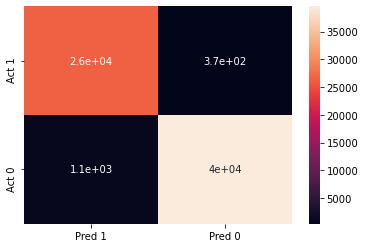

In [12]:
cm1 =confusion_matrix(y_test,y_predict,labels=[1,0])
dfx = pd.DataFrame(cm1,
columns=['Pred 1','Pred 0'],
index=['Act 1','Act 0'])
sns.heatmap(dfx,annot=True)

In [13]:
roc_auc_score(y_test,y_predict)

0.9796237253038477

<b>K Nearest Neighbours Classifier (Default)</b>

In [14]:
modelKNNdefault = KNeighborsClassifier()
modelKNNdefault.fit(X_train,y_train)
y_predict_KNNdefault = modelKNNdefault.predict(X_test)

In [15]:
print(classification_report(y_test,y_predict_KNNdefault))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     40625
           1       0.99      1.00      0.99     26791

    accuracy                           0.99     67416
   macro avg       0.99      1.00      0.99     67416
weighted avg       0.99      0.99      0.99     67416



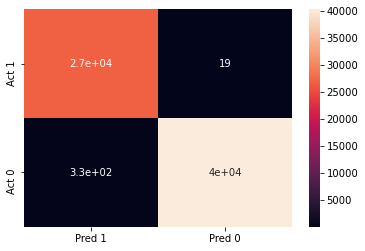

In [16]:
cm1 =confusion_matrix(y_test,y_predict_KNNdefault,labels=[1,0])
dfx = pd.DataFrame(cm1,
columns=['Pred 1','Pred 0'],
index=['Act 1','Act 0'])
sns.heatmap(dfx,annot=True)

In [17]:
roc_auc_score(y_test,y_predict_KNNdefault)

0.9956084802301577

<b>K Nearest Neighbours (Tuned)</b>

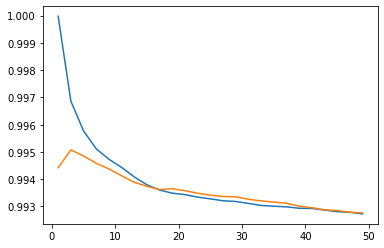

In [18]:
train_score = []
test_score = []
for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))

plt.plot(range(1,50,2),train_score, label='Train')
plt.plot(range(1,50,2),test_score, label='Test')

In [19]:
k1 = []
for i in range(1,50,2):
    k1.append(i)
k1[np.argmax(test_score)]

3

In [20]:
modelKNNTuned = KNeighborsClassifier(weights='distance',n_neighbors=k1[np.argmax(test_score)])
modelKNNTuned.fit(X_train,y_train)
y_predict_KNNTuned = modelKNNTuned.predict(X_test)

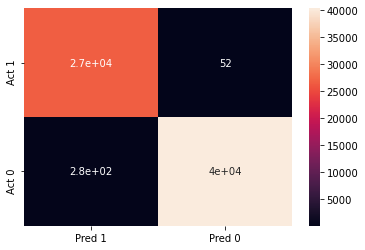

In [21]:
cm2 =confusion_matrix(y_test,y_predict_KNNTuned,labels=[1,0])
dfx = pd.DataFrame(cm2,
columns=['Pred 1','Pred 0'],
index=['Act 1','Act 0'])
sns.heatmap(dfx,annot=True)

In [22]:
roc_auc_score(y_test,y_predict_KNNTuned)

0.9955956786865853

<b>K Nearest Neighbours (Tuned) with Standard Scaler</b>

In [23]:
stdscaler = StandardScaler()
X_train_std = stdscaler.fit_transform(X_train)
X_test_std=stdscaler.fit_transform(X_test)

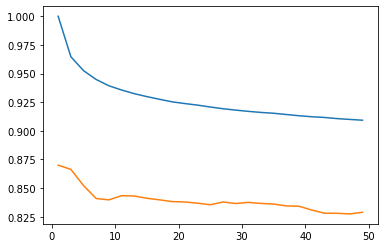

In [24]:
train_scores = []
test_scores = []
for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std,y_train)
    train_scores.append(knn.score(X_train_std,y_train))
    test_scores.append(knn.score(X_test_std,y_test))
plt.plot(range(1,50,2),train_scores, label='Train')
plt.plot(range(1,50,2),test_scores, label='Test')

In [25]:
k1 = []
for i in range(1,50,2):
    k1.append(i)
k1[np.argmax(test_scores)]

1

In [26]:
modelKNNStd = KNeighborsClassifier(weights='distance',n_neighbors=k1[np.argmax(test_scores)])
modelKNNStd.fit(X_train_std,y_train)
y_predKNN_std = modelKNNStd.predict(X_test_std)

In [27]:
print(classification_report(y_test,y_predKNN_std))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     40625
           1       0.86      0.81      0.83     26791

    accuracy                           0.87     67416
   macro avg       0.87      0.86      0.86     67416
weighted avg       0.87      0.87      0.87     67416



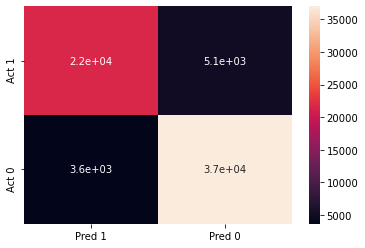

In [28]:
cm2 =confusion_matrix(y_test,y_predKNN_std,labels=[1,0])
dfx = pd.DataFrame(cm2,
columns=['Pred 1','Pred 0'],
index=['Act 1','Act 0'])
sns.heatmap(dfx,annot=True)

In [29]:
roc_auc_score(y_test,y_predKNN_std)

0.8596018414909714

<b>K Nearest Neighbours (Tuned) with Min Max Scaler</b>

In [30]:
minmaxscaler = MinMaxScaler()
X_train_min = minmaxscaler.fit_transform(X_train)
X_test_min=minmaxscaler.fit_transform(X_test)

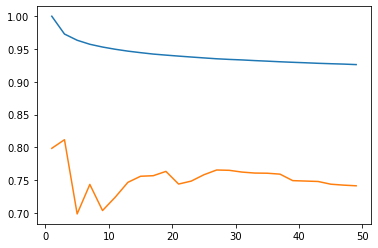

In [31]:
train_scorem = []
test_scorem = []
for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_min,y_train)
    train_scorem.append(knn.score(X_train_min,y_train))
    test_scorem.append(knn.score(X_test_min,y_test))
plt.plot(range(1,50,2),train_scorem, label='Train')
plt.plot(range(1,50,2),test_scorem, label='Test')

In [32]:
k1 = []
for i in range(1,50,2):
    k1.append(i)
k1[np.argmax(test_scorem)]

3

In [33]:
modelKNNmin = KNeighborsClassifier(weights='distance',n_neighbors=k1[np.argmax(test_scorem)])
modelKNNmin.fit(X_train_min,y_train)
y_predKNN_min = modelKNNmin.predict(X_test_min)

In [34]:
print(classification_report(y_test,y_predKNN_min))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85     40625
           1       0.81      0.69      0.74     26791

    accuracy                           0.81     67416
   macro avg       0.81      0.79      0.80     67416
weighted avg       0.81      0.81      0.81     67416



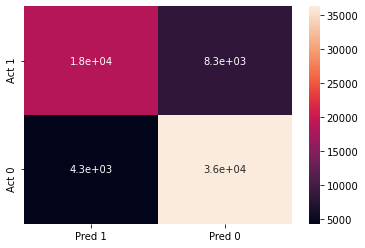

In [35]:
cm3 =confusion_matrix(y_test,y_predKNN_min,labels=[1,0])
dfx = pd.DataFrame(cm3,
columns=['Pred 1','Pred 0'],
index=['Act 1','Act 0'])
sns.heatmap(dfx,annot=True)

In [36]:
roc_auc_score(y_test,y_predKNN_min)

0.7907808796869212

<b>K Nearest Neighbours (Tuned) with Robust Scaler</b>

In [37]:
robustscaler = RobustScaler()
X_train_rob = robustscaler.fit_transform(X_train)
X_test_rob=robustscaler.fit_transform(X_test)

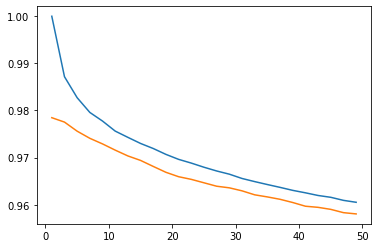

In [38]:
train_scorer = []
test_scorer = []
for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_rob,y_train)
    train_scorer.append(knn.score(X_train_rob,y_train))
    test_scorer.append(knn.score(X_test_rob,y_test))
plt.plot(range(1,50,2),train_scorer, label='Train')
plt.plot(range(1,50,2),test_scorer, label='Test')

In [39]:
k1 = []
for i in range(1,50,2):
    k1.append(i)
k1[np.argmax(test_scorer)]

1

In [40]:
modelKNNrob = KNeighborsClassifier(weights='distance',n_neighbors=k1[np.argmax(test_scorer)])
modelKNNrob.fit(X_train_rob,y_train)
y_predKNN_rob = modelKNNrob.predict(X_test_rob)

In [41]:
print(classification_report(y_test,y_predKNN_rob))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     40625
           1       0.97      0.98      0.97     26791

    accuracy                           0.98     67416
   macro avg       0.98      0.98      0.98     67416
weighted avg       0.98      0.98      0.98     67416



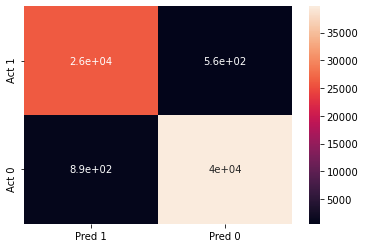

In [42]:
cm4 =confusion_matrix(y_test,y_predKNN_rob,labels=[1,0])
dfx = pd.DataFrame(cm4,
columns=['Pred 1','Pred 0'],
index=['Act 1','Act 0'])
sns.heatmap(dfx,annot=True)

In [43]:
roc_auc_score(y_test,y_predKNN_rob)

0.9785766228038693

In [49]:
ModelXGB = XGBClassifier()

In [50]:
ModelXGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
y_predX = ModelXGB.predict(X_test)

In [52]:
y_trainX = ModelXGB.predict(X_train)

In [53]:
print(classification_report(y_train, y_trainX))
print('=' * 100)
print(classification_report(y_test, y_predX)), 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    162498
           1       1.00      1.00      1.00    107165

    accuracy                           1.00    269663
   macro avg       1.00      1.00      1.00    269663
weighted avg       1.00      1.00      1.00    269663

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40625
           1       1.00      1.00      1.00     26791

    accuracy                           1.00     67416
   macro avg       1.00      1.00      1.00     67416
weighted avg       1.00      1.00      1.00     67416



(None,)

In [54]:
accuracy_score(y_test, y_predX)

0.9980865076539693

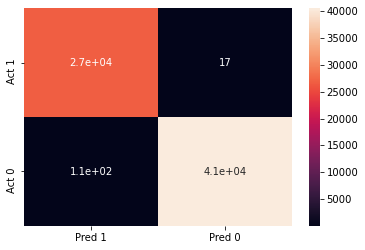

In [56]:
cm5 =confusion_matrix(y_test,y_predX,labels=[1,0])
dfx = pd.DataFrame(cm5,
columns=['Pred 1','Pred 0'],
index=['Act 1','Act 0'])
sns.heatmap(dfx,annot=True)